## Telemetry & Time-Series Analysis

This section simulates telemetry data similar to what is used in:
- Aircraft health monitoring
- Satellite systems
- Industrial control systems (BMS, SCADA)

The goal is to understand trends, degradation, and anomalies over time.

Generate telemetry data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create time series (100 time points)
time = pd.date_range(start="2025-01-01", periods=100, freq="H")

telemetry_df = pd.DataFrame({
    "timestamp": time,
    "engine_temperature": np.random.normal(loc=70, scale=5, size=100),
    "vibration_level": np.random.normal(loc=2.5, scale=0.3, size=100),
    "battery_voltage": np.random.normal(loc=28, scale=0.5, size=100)
})

telemetry_df.head()

/tmp/ipython-input-1172593825.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range(start="2025-01-01", periods=100, freq="H")


,timestamp,engine_temperature,vibration_level,battery_voltage
0,2025-01-01 00:00:00,65.855025,2.021672,28.463089
1,2025-01-01 01:00:00,67.199095,2.320187,28.954708
2,2025-01-01 02:00:00,73.736468,2.501573,27.300716
3,2025-01-01 03:00:00,73.051851,2.514094,28.281485
4,2025-01-01 04:00:00,69.895492,2.364980,27.674679


Introduce degradation

In [8]:
telemetry_df["engine_temperature"] += np.linspace(0, 15, 100)
telemetry_df["vibration_level"] += np.linspace(0, 1.2, 100)

Plot telemetry trends

Engine temperature trend

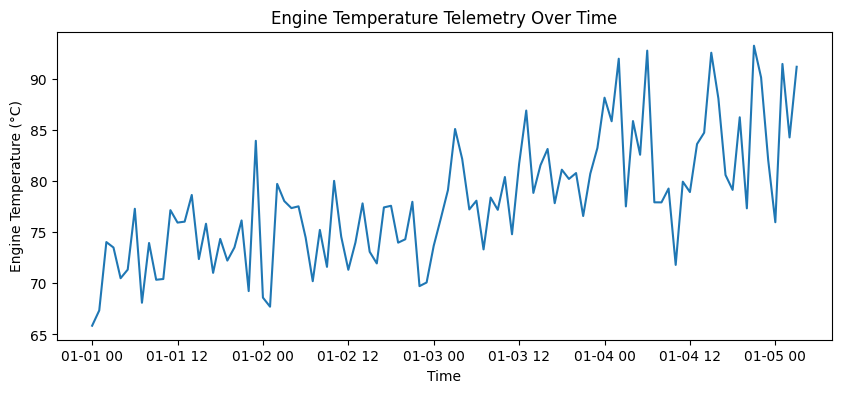

In [9]:
plt.figure(figsize=(10,4))
plt.plot(telemetry_df["timestamp"], telemetry_df["engine_temperature"])
plt.xlabel("Time")
plt.ylabel("Engine Temperature (°C)")
plt.title("Engine Temperature Telemetry Over Time")
plt.show()

### Telemetry Insight – Engine Temperature

The temperature shows a gradual upward trend over time.
This indicates progressive thermal stress or component degradation.

In real systems, such a trend would trigger:
- Preventive maintenance
- Load reduction
- Component inspection

Vibration monitoring

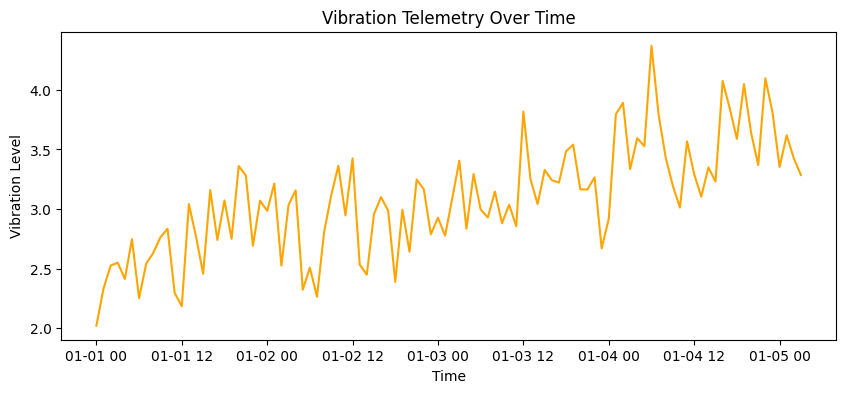

In [10]:
plt.figure(figsize=(10,4))
plt.plot(telemetry_df["timestamp"], telemetry_df["vibration_level"], color="orange")
plt.xlabel("Time")
plt.ylabel("Vibration Level")
plt.title("Vibration Telemetry Over Time")
plt.show()

Increasing vibration levels often indicate mechanical imbalance or bearing wear.
In aircraft and ships, vibration trends are strong predictors of failure.

Define operational thresholds

In [11]:
telemetry_df["temp_alert"] = telemetry_df["engine_temperature"] > 85
telemetry_df["vibration_alert"] = telemetry_df["vibration_level"] > 4

Count alerts

In [12]:
telemetry_df[["temp_alert", "vibration_alert"]].sum()

,0
temp_alert,14
vibration_alert,4


Alert visualization

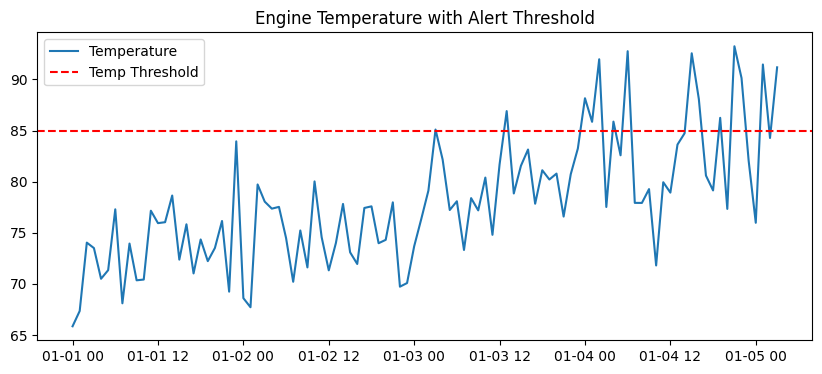

In [13]:
plt.figure(figsize=(10,4))
plt.plot(telemetry_df["timestamp"], telemetry_df["engine_temperature"], label="Temperature")
plt.axhline(85, color="red", linestyle="--", label="Temp Threshold")
plt.legend()
plt.title("Engine Temperature with Alert Threshold")
plt.show()

## Telemetry Summary

- Telemetry data provides continuous visibility into system health
- Trend analysis helps detect degradation before failure
- Threshold-based alerts support preventive maintenance
- This approach is widely used in aviation, aerospace, maritime, and industrial systems

Why anomaly detection matters
## Anomaly Detection in Telemetry Systems

In telemetry-based systems, failures are rare but costly.
Anomaly detection helps identify unusual system behavior
before a failure occurs, enabling preventive action.

This approach is used in:
- Aircraft health monitoring
- Satellite operations
- Industrial equipment
- Smart buildings and infrastructure


Prepare data for anomaly detection

In [14]:
from sklearn.ensemble import IsolationForest

features = telemetry_df[[
    "engine_temperature",
    "vibration_level",
    "battery_voltage"
]]

Train Isolation Forest

In [15]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

telemetry_df["anomaly"] = model.fit_predict(features)

Identify anomalous points

In [16]:
anomalies = telemetry_df[telemetry_df["anomaly"] == -1]
anomalies.head()

,timestamp,engine_temperature,vibration_level,battery_voltage,temp_alert,vibration_alert,anomaly
0,2025-01-01 00:00:00,65.855025,2.021672,28.463089,False,False,-1
1,2025-01-01 01:00:00,67.350610,2.332309,28.954708,False,False,-1
61,2025-01-03 13:00:00,86.906119,3.249973,29.037700,True,False,-1
78,2025-01-04 06:00:00,92.767196,4.369119,27.260707,True,True,-1
94,2025-01-04 22:00:00,90.139625,4.096331,28.518770,True,True,-1


Visualize anomalies

Engine temperature with anomalies

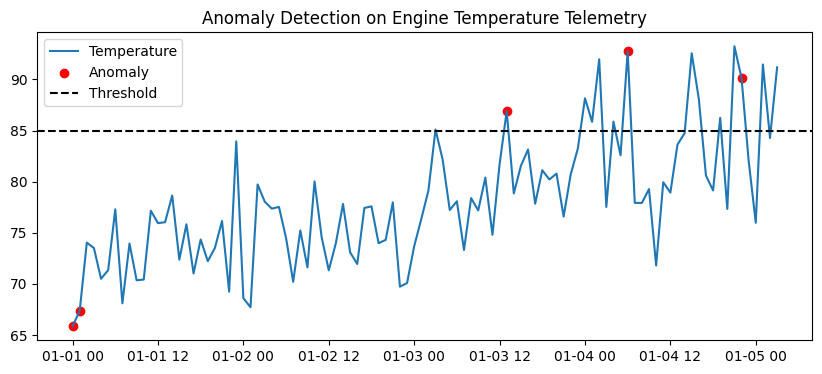

In [17]:
plt.figure(figsize=(10,4))
plt.plot(
    telemetry_df["timestamp"],
    telemetry_df["engine_temperature"],
    label="Temperature"
)

plt.scatter(
    anomalies["timestamp"],
    anomalies["engine_temperature"],
    color="red",
    label="Anomaly"
)

plt.axhline(85, color="black", linestyle="--", label="Threshold")
plt.legend()
plt.title("Anomaly Detection on Engine Temperature Telemetry")
plt.show()

### Anomaly Interpretation

Detected anomalies correspond to periods where
temperature and vibration deviate significantly
from normal operating patterns.

These anomalies may indicate:
- Accelerated component wear
- Sensor faults
- Abnormal operating conditions

In real-world systems, such detections trigger
inspection, diagnostics, or preventive maintenance.

Count & assess risk

In [18]:
len(anomalies)

5

A small number of anomalies is expected in healthy systems.
A rising frequency of anomalies would indicate increasing risk.

Cost of Failure & Business Impact Analysis

## Cost of Failure Analysis

In critical systems, failures have significant financial,
operational, and safety impact.

Telemetry and anomaly detection are valuable because they:
- Reduce unplanned downtime
- Prevent cascading failures
- Enable cost-effective preventive maintenance

Define realistic cost assumptions

In [19]:
EMERGENCY_MAINTENANCE_COST = 50000
DOWNTIME_COST_PER_HOUR = 8000
DOWNTIME_HOURS = 5

FAILURE_COST = EMERGENCY_MAINTENANCE_COST + (DOWNTIME_COST_PER_HOUR * DOWNTIME_HOURS)
FAILURE_COST

90000

Estimate risk using anomaly frequency

In [20]:
FAILURE_PROBABILITY_PER_ANOMALY = 0.15

expected_failures = len(anomalies) * FAILURE_PROBABILITY_PER_ANOMALY
expected_failures

0.75

Expected cost WITHOUT preventive action

In [21]:
expected_failure_cost = expected_failures * FAILURE_COST
expected_failure_cost

67500.0

Cost WITH preventive maintenance

In [23]:
PREVENTIVE_COST_PER_ANOMALY = 5000

preventive_cost = len(anomalies) * PREVENTIVE_COST_PER_ANOMALY
preventive_cost

25000

Cost comparison

In [24]:
cost_savings = expected_failure_cost - preventive_cost
cost_savings

42500.0

Turn numbers into a decision

## Business Decision Insight

- Expected cost of unplanned failures: $67500
- Cost of preventive maintenance: $25000

Preventive maintenance based on telemetry-driven anomaly detection
results in significant cost savings and reduced operational risk.

Recommendation:
Adopt telemetry-based monitoring to enable proactive maintenance
and avoid high-impact failures.